<a href="https://colab.research.google.com/github/ravichas/bifx-546/blob/main/Notebooks/Chapter8_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent (GD)

GD is a method to finding the minimum of a function (lowest point). This is often explained as similar to walking downhill on a cloudy mountain.

In simple words, from your current position, you look at the slope (the gradient) to see which direction goes down the fastest. Then you take a small step in that direction. You repeat this step until your steps dont get you lower.

In ML, this is how we adjust model parameters (like weights in NN) to reduce error on the training data



## Why Do We Need Gradient Descent?

From the book,

`We want to minimize (input a value(s) that make the function output as small as possible) a function, but we dont have a closed-form solution`

## Example of a closed-form solution

Consider:
Minimization of
$$f(x) = x^2$$

Take derivative
$$ df/dx = 2x $$

Set derivative to zero:

2x = 0 -> x = 0

## Example of a function without closed form solution

$$ f(x) = x^4 + x^2 + sin(x) $$

You can take the derivative but solving (df/dx=0) will not result in a clean form. You can find a numerical solution.



```
def square(x):
  return x * x
```
inputs: x
output: x$^2$
question: which x gives the smallest value of $x^2$? (x = 0)
Function: square(x)
Minimum -> lowest point of the curve

In datascience and ML:
* The function is usually error/loss function
* inputs: model parameters
* output: measures how bad the model is

So, minimizing a function means:
`Choose model parameters that make the model's error as small as possible`



Examples:
* Minimize sum of squared errors
* Fit a line by choosing parameters
* Tune model parameters

Questions to ask:
* What if the funciton is complicated?
* What if there are many parameters
* What if derivatives exist but solutions dont?






# Why this matters

In real ML problems:
* Loss functions are complicated
* High Dimensional
* often sums of millions of terms

Even if derivatives exist:
* Solving them exactly is impossible



# Details of SD

* Data (x1, y1), (x2, y2), ..., (xn, yn)
* Assume a linear model, y = mx + b
* We need to decide what the loss function is, Mean squared Error
* Batch size (subset; mini-batch)

## complete setup

* initialize: m = 0, b = 0
* LR = 0.001
* Batch size = 100
* Total data = 1000 points
* Total # of batches per epoch: 1000/100 = 10

Epoch: 1

Batch 1 (samples 1-100)
* Step 1: get batch data
  ```
  x_batch = [x1, x2, ..., x100]
  y_batch = [y1, y2, ..., y100]
  ```

* Step2:  L = MSQ error
Loss function: $$L = (1/100) \sum_{i=1}^{100}(mx_{i} + b - y_{i})^2 $$

  Parameters to optimize: m and b

  Gradient formulas:

  ($\partial L/\partial m)$

  ($\partial L/\partial b)$

   dL_dm = (2/n) * sum(m * x[i] + b - y[i]) * x[i])

   dL_db = (2/n) * sum(m * x[i] + b - y[i]))

   $\text{dL_dm} = (2/100) \sum_{i=1}^{100} (m x_{i} + b - y_i) * x_{i}$

  $\text{dL_db} = (2/100) \sum_{i=1}^{100} (m x_{i} + b - y_i)$

* Step3: update m and b

  m = m_old - lr * dl_dm

  suppose if we get lr = 0.001; dL/dm = -13 and dL/db = -7

  m = 0 - 0.001 * (-13) = 0 + 0.013 (m_old (beginning m) = 0)
  
  b = b_old - lr * dl_db
  (one could calculate b)

  Justification of formula for update

  if $\partial L/\partial m = +ve (say +5); lr = 0.001
    * Loss increases if we increase m
    * update: m_new = m_old - 0.001 * (+5) = m_old - 0.005
    * Right thing is to decrease m
  
  if $\partial L/\partial m = -ve (say -5)
  * Loss increases if we increase m
  * update: m_new = m_old - 0.001 * (-5) = m_old + 0.005
  * Right thing is to increase m

* step 4: Batch 2 (samples 101-200)

  ```
  x_batch = [x101, x102, ..., x200]
  y_batch = [y101, y102, ..., y200]
  ```

  Compute loss on this second batch

  $L = (1/100) \sum_{i=101}^{200}(m x_{i} + b - y_{i})^2 $

  Note: Use updated m and b calculated in the previous step

* Step 5: Compute gradients

  $\text{dL_dm} = (2/100) \sum_{i=101}^{200} (m x_{i} + b - y_i) * x_{i}$

  $\text{dL_db} = (2/100) \sum_{i=101}^{200} (m x_{i} + b - y_i)$

  use the new dl_dm and dl_db to update m and b. For m_old and b_old use the previously updated m and b

* Step 6: Batches 3 - 10

   Repate the same process for rest of the batches (201-300 .... 901-1000)

* This will conclude one epoch (Epoch 1)
  * 1000 data points in 10 batches of 100
  * parameters updated 10 times (once per batch
  * current values m and b (after 10 updates are the final m and b)

Before Epoch 2

  * shuffle the data (important)
  * Split the data into 10 mini batches (new)
  * Repeat the process described above


   

# Many different method


|Method|Batch-size|Gradient Computed from| Updates/Epoch|
|----|----|-----|---|
|Batch GD | 1000 (all) |  All 1K samples| 1 |
|SGD | 1 | Single Sample| 1000 |
|Mini-Batch| 100 | 100 samples| 10|


# Advantages of Batches

1. Faster than Batch GD
2. Less noisy (more stable)
3. Memory efficient (dont need to load all data at once)
4. GPU friendly

```
for epoch in 1 to num_epochs:
   shuffle(data)

   for each batch in data:
      # forward pass
      predictions = m * x_batch + b
      loss = mean((predictions - y_batch)^2)

      # compuate GR (only for this batch)
      dL_dm = (2/batch_size) * sum(predictions - y_batch) * x_batch
      dL_db = 2/batch_size) * sum(predictions - y_batch)

      # update
      m = m - lr * dL_dm
      b = b - lr * dL_db
```

```



In [24]:
# ==== Course setup: safe clone + cd + import path ====
import os
import sys

REPO_URL = "https://github.com/joelgrus/data-science-from-scratch.git"
REPO_DIR = "data-science-from-scratch"

# 1. If we're *anywhere inside* the repo, move to the parent directory first
cwd = os.getcwd()
if REPO_DIR in cwd.split(os.sep):
    parts = cwd.split(os.sep)
    # Walk up until we are at .../data-science-from-scratch
    while parts and parts[-1] != REPO_DIR:
        parts.pop()
    # Now go to the directory *above* the repo
    parent_dir = os.sep.join(parts[:-1]) or "/"
    os.chdir(parent_dir)
    print(f"Moved to parent directory: {os.getcwd()}")

# 2. Clone only if needed
if not os.path.exists(REPO_DIR):
    print("Cloning repo...")
    !git clone {REPO_URL}
else:
    print(f"{REPO_DIR} already exists — skipping clone.")

# 3. cd into the repo (this is where you'll live most of the time)
%cd {REPO_DIR}

# 4. Ensure the repo is importable (for scratch.linear_algebra, etc.)
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
    print("Added repo to sys.path")

Moved to parent directory: /content
data-science-from-scratch already exists — skipping clone.
/content/data-science-from-scratch


# Explanation of the following code

* `Callable[ [ArgType1, ArgType2, ...], ReturnType1 `
* Example,  `f: Callable[ [float], float]` means that f is a function that takes one arg (either x or  (x+h) and returns one result, float

In [25]:
from typing import Callable
def difference_quotient(f: Callable[[float], float],
                        x: float, h: float) -> float:
  return (f(x + h) - f(x)) / h

In [26]:
import random
from scratch.linear_algebra import Vector, dot

from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [27]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [28]:
inputs[0:10]

[(-50, -995),
 (-49, -975),
 (-48, -955),
 (-47, -935),
 (-46, -915),
 (-45, -895),
 (-44, -875),
 (-43, -855),
 (-42, -835),
 (-41, -815)]

# Basic information

* x: input (feature)
* y: observed output (label)
* m, b: model parameters (slope and intercept)

The model is: $\hat{y} = m x + b$

# 1) Model and loss

You have a linear model:
* parameters: $\theta$ = (m, b) where m = slope, b = intercept
* prediction:
$\hat y = m x + b$
* error:
$$e = \hat{y} - y = (mx + b - y)$$
* Our goal is to find values of m and b that make the model’s predictions $\hat {y}$ as close as possible to the observed y.

* We measure “closeness” using a loss function, here:
$L(m,b) = (mx + b - y)^2$
* squared error loss for one data point:
$L(m,b) = e^2 = (mx + b - y)^2$
* Why we take derivatives wrt m and b
  * x and y are data (given, fixed)
	* m and b are variables we can change

  So we ask:
  *	“If I slightly change m, does the loss go up or down?”
	*	“If I slightly change b, does the loss go up or down?”
  
  That’s why the gradient is taken with respect to m and b, not with respect to x or y.
  
We want $\nabla_\theta L = \left[\frac{\partial L}{\partial m},\frac{\partial L}{\partial b}\right]$.

#Partial wrt m (slope)

$\frac{\partial L}{\partial m}$

Answers:

“If I change the slope slightly, keeping the intercept fixed, how does the loss change?”

That’s why it depends on:
* the error
* the input value x (because slope affects prediction via x)

## Derivation

Use chain rule. Let e = mx + b - y, so $L = e^2$.

$\frac{\partial L}{\partial m} = \frac{\partial (e^2)}{\partial e}\cdot \frac{\partial e}{\partial m}$
*	$\frac{\partial (e^2)}{\partial e} = 2e$
* $\frac{\partial e}{\partial m} = x$ (because e = mx + b - y)

So:
$\frac{\partial L}{\partial m} = 2e \cdot x$

That matches 2 * error * x.


# Partial wrt b (intercept)

$\frac{\partial L}{\partial b}$

##Answers:

“If I shift the line up or down slightly, keeping the slope fixed, how does the loss change?”

That’s why:
* it depends on the error
* but not on x

## Derivation

$\frac{\partial L}{\partial b} = \frac{\partial (e^2)}{\partial e}\cdot \frac{\partial e}{\partial b}$
* $\frac{\partial (e^2)}{\partial e} = 2e$
* $\frac{\partial e}{\partial b} = 1$

So:
$\frac{\partial L}{\partial b} = 2e$

That matches 2 * error.


In [29]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

# Meaning of  `TypeVar`

`dataset: List[T]`

Means:
* dataset is a list of **some type**
* All elements have the *same type*
* That type is called T
* TypeVar says, "whatever type goes in, the same type comes out - whatever the type it is"

In [30]:
# Example
from typing import TypeVar, List, Iterator

# Step 1: Define a TypeVar
T = TypeVar('T')

# Step 2: Define minibatches using T
def minibatches(dataset: List[T], batch_size: int) -> Iterator[List[T]]:
    for i in range(0, len(dataset), batch_size):
        yield dataset[i:i + batch_size]
        # give me one result, and remember where you were
        # builds and return the list upon return

# Step 3: Call minibatches with a concrete dataset
numbers: List[int] = [10, 20, 30, 40]

# Step 4: Use the result
for batch in minibatches(numbers, batch_size=2):
    print(batch, type(batch[0]))

# return [ [1,2], [3, 4]]

[10, 20] <class 'int'>
[30, 40] <class 'int'>


In [31]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]


# Estimate Derivatives and Comparing it with True Values

In [32]:
# example

# note already defined in scratch/linear_algebra.py
# from typing import List
# Vector = List[float]

print(type(Vector))

<class 'typing._GenericAlias'>


In [33]:
my_list = [1.0, 2.0, 3.0]
v: Vector = my_list

print(v)

[1.0, 2.0, 3.0]


# Example code chunks

In [34]:
from typing import List, Dict, Tuple, Optional

count: int = 11
price: float = 9.99
name: str = "Hello"
is_active: bool = True

# collections
numbers: List[int] = [1, 2, 3]
coordinates: Tuple[float, float] = [1.5, 2.5]
scores: Dict[str, float] = {"Alice": 95.5, "Bob": 87.3}

# custom type
#Vector = List[float] # already defined
position: Vector = [1.0, 2.0, 3.0]

# Optional can be None)
middle_name: Optional[str] = None

In [47]:
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
          for j, v_j in enumerate(v)]
    print('w', w)
    return (f(w) - f(v)) / h

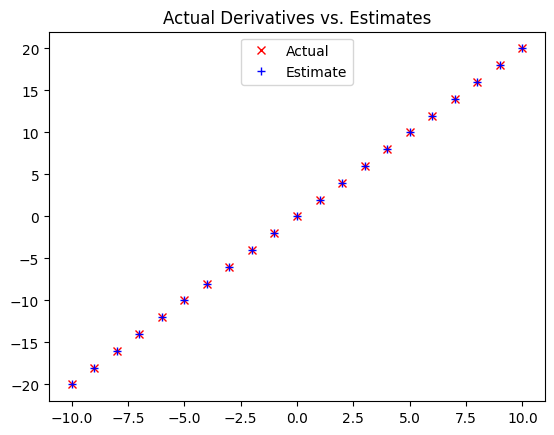

In [48]:

xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
plt.legend(loc=9)
# plt.show()

# Partial Derivatives

`f` is a function of many variables, and it has multiple partial derivatives, each indicating how f changes when we make small changes to one input variable keeping others fixed.

In [49]:
v = [random.uniform(-10, 10) for i in range(3)]
v

[5.95112379034733, 4.458766517097532, 4.8942633842727385]

# Example

In [50]:
# f(x, y) = x^2 + 2xy + y^3
def my_fun(v:Vector) -> float:
  x,y = v[0], v[1]
  return x**2 + 2*x*y + y**3

point = [1.0, 2.0] # evaluate at point (1,2)
h = 0.000001

pd_x = partial_difference_quotient(my_fun, point, i=0, h=h)
print(f"df/dx, at(1,2) ~ {pd_x: 4f}")

pd_y = partial_difference_quotient(my_fun, point, i=1, h=h)
print(f"df/dy, at(1,2) ~ {pd_y: 4f}")

w [1.000001, 2.0]
df/dx, at(1,2) ~  6.000001
w [1.0, 2.000001]
df/dy, at(1,2) ~  14.000006


In [51]:
# "Using the Gradient" example

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

In [52]:
v

[6.746593543738776, 0.8183963845376105, -3.1773548219176533]

# Calculate Gradient

Example code from book, page 101

In [54]:
for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0

0 [6.611661672864, 0.8020284568468583, -3.1138077254793]
1 [6.479428439406719, 0.7859878877099211, -3.0515315709697144]
2 [6.3498398706185855, 0.7702681299557227, -2.99050093955032]
3 [6.222843073206214, 0.7548627673566083, -2.930690920759314]
4 [6.098386211742089, 0.7397655120094762, -2.872077102344128]
5 [5.976418487507248, 0.7249702017692866, -2.8146355602972455]
6 [5.856890117757103, 0.7104707977339009, -2.7583428490913007]
7 [5.739752315401961, 0.6962613817792228, -2.7031759921094745]
8 [5.624957269093922, 0.6823361541436384, -2.649112472267285]
9 [5.512458123712043, 0.6686894310607656, -2.596130222821939]
10 [5.402208961237802, 0.6553156424395503, -2.5442076183655002]
11 [5.294164782013046, 0.6422093295907593, -2.4933234659981904]
12 [5.188281486372785, 0.6293651429989441, -2.4434569966782265]
13 [5.084515856645329, 0.6167778401389652, -2.394587856744662]
14 [4.982825539512422, 0.6044422833361859, -2.3466960996097685]
15 [4.883169028722174, 0.5923534376694621, -2.2997621776175734

In [55]:
inputs

[(-50, -995),
 (-49, -975),
 (-48, -955),
 (-47, -935),
 (-46, -915),
 (-45, -895),
 (-44, -875),
 (-43, -855),
 (-42, -835),
 (-41, -815),
 (-40, -795),
 (-39, -775),
 (-38, -755),
 (-37, -735),
 (-36, -715),
 (-35, -695),
 (-34, -675),
 (-33, -655),
 (-32, -635),
 (-31, -615),
 (-30, -595),
 (-29, -575),
 (-28, -555),
 (-27, -535),
 (-26, -515),
 (-25, -495),
 (-24, -475),
 (-23, -455),
 (-22, -435),
 (-21, -415),
 (-20, -395),
 (-19, -375),
 (-18, -355),
 (-17, -335),
 (-16, -315),
 (-15, -295),
 (-14, -275),
 (-13, -255),
 (-12, -235),
 (-11, -215),
 (-10, -195),
 (-9, -175),
 (-8, -155),
 (-7, -135),
 (-6, -115),
 (-5, -95),
 (-4, -75),
 (-3, -55),
 (-2, -35),
 (-1, -15),
 (0, 5),
 (1, 25),
 (2, 45),
 (3, 65),
 (4, 85),
 (5, 105),
 (6, 125),
 (7, 145),
 (8, 165),
 (9, 185),
 (10, 205),
 (11, 225),
 (12, 245),
 (13, 265),
 (14, 285),
 (15, 305),
 (16, 325),
 (17, 345),
 (18, 365),
 (19, 385),
 (20, 405),
 (21, 425),
 (22, 445),
 (23, 465),
 (24, 485),
 (25, 505),
 (26, 525),
 (27, 

# Steps for the following code

* inputs are list of tuples of [(x1,y1)...(xn,yn)]
* For one data point:
$L_i(m,b) = (mx_i + b - y_i)^2$
* For all data points, the objective is usually the mean squared error:
$$L(m,b) = \frac{1}{n}\sum_{i=1}^n L_i(m,b)$$
* We calculate $\partial L / \partial m and \partial L / \partial b for each point$
More precisely, we compute:
$\frac{\partial L_i}{\partial m}, \quad \frac{\partial L_i}{\partial b}$
* This’s what `linear_gradient(x, y, theta)` returns.
* Each point has a 2D gradient vector. Exactly. each data point produces:
$\nabla L_i = [2(x_i)(mx_i+b-y_i),\ 2(mx_i+b-y_i)]$
  * A 2D vector because there are two parameters.
* `grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])`
  * (e) Why do we average all gradients? (this is the key conceptual step)
  
  This part is subtle but crucial.

  What are we minimizing?

  Not each $L_i$ individually — we want to minimize the average loss:

  $L(m,b) = \frac{1}{n}\sum_{i=1}^n L_i(m,b)$

  Gradient of a sum = sum of gradients

  A fundamental calculus fact:
  $\nabla \left(\frac{1}{n}\sum_{i=1}^n L_i\right)
  =
  \frac{1}{n}\sum_{i=1}^n \nabla L_i$

  So:
    * averaging gradients is not arbitrary
    * it is exactly the gradient of the objective we care about
* Update theta,
  * `theta = gradient_step(theta, grad, -learning_rate)`
  * This does: $\theta \leftarrow \theta - \eta \nabla L$ ; why multiply by minus because we want to go downhill
  * Where:
	  * $\eta$ = learning rate
	  *	move against the gradient to go downhill

  This slightly improves m and b.
* This completes one epoch,
  computes:
$\left[
\frac{\partial L_i}{\partial m},
\frac{\partial L_i}{\partial b}
\right]$

In [58]:
# First "Using Gradient Descent to Fit Models" example

from scratch.linear_algebra import vector_mean

# Start with random values for slope and intercept.
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    #print(epoch, theta)

slope, intercept = theta
print('Final theta is: ', theta)
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

Final theta is:  [19.999999862067206, 4.999770341816182]


# First improvement using batches

The improvement is how the gradient is computed and how often you update $\theta$.

In the previous (“batch gradient descent”) code, each epoch did:
* compute gradients for all points
* average them
* one update of $\theta$

Here (“mini-batch gradient descent”), each epoch does:
* split the data into small batches (here size 20)
* for each batch:
* compute gradients on just that batch
* average them
* update $\theta$ immediately
* so you get many updates per epoch

Previous code (**batch GD**)

Per epoch:
* 1 gradient computed from N points
* 1 update

New code (**mini-batch GD**)[see below]

Per epoch:
* N / 20 gradients computed (one per batch)
* N / 20 updates

If you have 100 points, batch size 20 → 5 updates per epoch.

In [60]:
# Minibatch gradient descent example

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    # print(epoch, theta)

slope, intercept = theta
print('Final theta is: ', theta)

assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

Final theta is:  [20.00000001382453, 4.999999267069542]


# What’s different vs mini-batch?

* Batch size is 1 (one example at a time)

In SGD, each update uses a single training example (x,y):

```
for x, y in inputs:
    grad = linear_gradient(x, y, theta)
    theta = gradient_step(theta, grad, -learning_rate)
```
So every iteration of that inner loop:
* computes the gradient from one point
* updates theta immediately

This is equivalent to mini-batch with batch_size=1.

* No vector_mean(...) needed

Because you only have one gradient vector, there’s nothing to average.

**Mini-batch:**

```
grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
```

**SGD**

```
grad = linear_gradient(x, y, theta)
```

# How to understand one “epoch” in SGD

An epoch in that SGD code means:

`“Make one pass through the full dataset, updating parameters after each example.”`

So if inputs has 100 points:
* one epoch = 100 updates
* 100 epochs = 10,000 updates

**This is why SGD often uses fewer epochs than batch GD: it already does many updates.**


Why SGD is considered an “improvement” (in many settings)
* Each update is cheap (uses one point)
* You can start improving immediately without scanning all data
* Scales well when you have huge datasets
* The “noise” in the updates can help in complex, non-convex problems

Tradeoff:
* updates are noisier (loss may bounce around), but you often reach a good solution faster in practice.

In [61]:
# Stochastic gradient descent example

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    # print(epoch, theta)

slope, intercept = theta
print('Final theta is: ', theta)

assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


Final theta is:  [20.00145197589128, 4.927731102319888]


# Partial Differential Coefficient Code

The following code numerically approximates the partial derivative of a multivariable function with respect to one coordinate.

$$ \frac{\partial f}{\partial v_i}(v) \;\approx\; \frac{f(v + h\,e_i) - f(v)}{h} $$


Note:

* f(v) -> function value at original point
* f(w) -> function value at a small step in direction i
* subtract -> change in function value
 divide by h -> rate of change
* Key line of the code
```
v = [2.0, 3.0, 5.0]
i = 1
h = 0.001
```
Then the code will change

```
w = [2.0, 3.001, 5.0]
```

# Why this function works without calculus formuls

This function:
* Does not know the derivative of f
* Does not assume f has a symbolic form
* only needs to evaluate f

# Nutshell
* This fun approximates gradient numerically
* Even when derivatives are hard or unknown (even without closed-form derivatives)

`
This function approximates a partial derivative by nudging one coordinate slightly and measuring how much the function value changes.
`

```
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
          for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h
```